In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:

import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from PPO import PPO, PPOContinuous
import pdb

env = gym.make("Pendulum-v0")
# env = gym.make("MountainCarContinuous-v0")

env.seed(10)

state_size = env.observation_space.shape[0]
action_size =env.action_space.shape[0]

print(state_size)
print(action_size)

# PPO Settings
update_every = 2000
num_learn = 40
win_condition = 0

# Agent settings
hidden_size=128
epsilon=0.2
entropy_beta=0.01
gamma=0.99
lr=0.0003

agent = PPOContinuous(state_size, action_size, hidden_size=hidden_size, epsilon=epsilon, entropy_beta=entropy_beta, gamma=gamma, lr=lr)

In [2]:
def train(n_episodes=4000, max_t=1500):
  steps = 0
  scores_deque = deque(maxlen=100)
  scores = []
  average_scores = []
  max_score = -np.Inf

#   agent = PPO(state_size, action_size, hidden_size=hidden_size, epsilon=epsilon, entropy_beta=entropy_beta, gamma=gamma, lr=lr)

  for episode in range(1, n_episodes+1):
    state = env.reset()
    score = 0
    
    for t in range(max_t):
      steps += 1

      actions_tensor, log_prob = agent.act(torch.FloatTensor(state))
      actions = actions_tensor.cpu().data.numpy().flatten()
      next_state, reward, done, _ = env.step(actions_tensor)

      agent.mem.add(torch.FloatTensor(state), actions, reward, log_prob, done)

      # Update 
      state = next_state
      score += reward.item()

      if steps >= update_every:
        agent.learn(num_learn)
        agent.mem.clear()
        steps = 0

      if done:
        break
    
    # Book Keeping
    scores_deque.append(score)
    scores.append(score)
    average_scores.append(np.mean(scores_deque))
      
    if episode % 10 == 0:
      print("\rEpisode {}	Average Score: {:.2f}	Score: {:.2f}".format(episode, np.mean(scores_deque), score), end="")
    if episode % 100 == 0:
      print("\rEpisode {}	Average Score: {:.2f}".format(episode, np.mean(scores_deque)))   
    
    if np.mean(scores_deque) > win_condition:
      print("\rEnvironment Solved in {} episodes!".format(episode))
      break


  return scores, average_scores

scores, average_scores = train()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


3
1


/Users/darylrodrigo/Desktop/rl_lib/Policy Gradient/src/PPO/PPO.py:131: UserWarning: Using a target size (torch.Size([2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = -torch.min(surrogate_1, surrogate_2) + 0.5*F.mse_loss(values, discounted_returns) - self.entropy_beta*entropy


Episode 100	Average Score: -1125.92	Score: -1263.73
Episode 200	Average Score: -1098.89	Score: -1029.21
Episode 300	Average Score: -1039.29	Score: -1012.33
Episode 400	Average Score: -1031.42	Score: -1049.62
Episode 500	Average Score: -1178.31	Score: -902.217
Episode 600	Average Score: -1116.65	Score: -1218.45
Episode 700	Average Score: -1154.67	Score: -1166.01
Episode 800	Average Score: -1113.46	Score: -1026.40
Episode 900	Average Score: -1023.61	Score: -1114.90
Episode 1000	Average Score: -963.59	Score: -974.955
Episode 1100	Average Score: -958.20	Score: -896.050
Episode 1200	Average Score: -933.37	Score: -1018.36
Episode 1300	Average Score: -911.74	Score: -894.023
Episode 1400	Average Score: -899.36	Score: -888.644
Episode 1500	Average Score: -898.29	Score: -745.981
Episode 1600	Average Score: -840.66	Score: -748.86
Episode 1700	Average Score: -813.52	Score: -719.505
Episode 1800	Average Score: -824.45	Score: -736.11
Episode 1900	Average Score: -772.81	Score: -561.094
Episode 2000	A

In [7]:
torch.save(agent.model.state_dict(), "pendulum_ppo_model.pth")
torch.save(agent.model_old.state_dict(), "pendulum_ppo_model_old.pth")

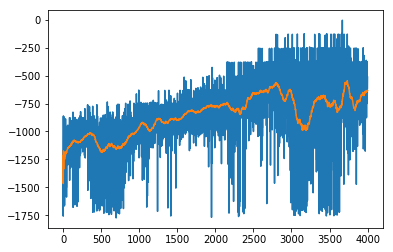

In [3]:
plt.plot(scores)
plt.plot(average_scores)

In [6]:
for episode in range(3):
    state = env.reset()
    score = 0
    input()

    for t in range(1500):
        actions_tensor, log_prob = agent.act(torch.FloatTensor(state))
        actions = actions_tensor.cpu().data.numpy().flatten()
        next_state, reward, done, _ = env.step(actions_tensor)

        
        score += reward
        
        env.render()
        
#         if done:
#             print(score)
#             break;
        
        state = next_state

env.close()

KeyboardInterrupt: 